<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/%E5%B2%A9%E6%B3%A2Meta_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install causalml

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import  train_test_split
from xgboost import XGBRFRegressor

from causalml.inference.meta import BaseXRegressor, BaseSRegressor, BaseTRegressor


In [ ]:
path = 'https://raw.githubusercontent.com/iwanami-datascience/vol3/master/kato%26hoshino/q_data_x.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(3)

,cm_dummy,gamedummy,area_kanto,area_keihan,area_tokai,area_keihanshin,age,sex,marry_dummy,job_dummy1,job_dummy2,job_dummy3,job_dummy4,job_dummy5,job_dummy6,job_dummy7,job_dummy8,inc,pmoney,fam_str_dummy1,fam_str_dummy2,fam_str_dummy3,fam_str_dummy4,fam_str_dummy5,child_dummy,T,F1,F2,F3,M1,M2,M3,TVwatch_day,gamesecond,gamecount
0,0,0,0,0,0,1,44.5,1,1,1,0,0,0,0,0,0,0,249.5,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,33.427600,0,0
1,0,0,0,1,0,0,34.5,1,1,1,0,0,0,0,0,0,0,800.0,12.5,0,0,1,0,0,1,0,0,0,0,0,1,0,31.542862,0,0
2,0,0,0,1,0,0,24.5,1,0,0,0,0,0,0,0,1,0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,1,0,0,37.825805,0,0


In [ ]:
df.columns

Index(['cm_dummy', 'gamedummy', 'area_kanto', 'area_keihan', 'area_tokai',
       'area_keihanshin', 'age', 'sex', 'marry_dummy', 'job_dummy1',
       'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5', 'job_dummy6',
       'job_dummy7', 'job_dummy8', 'inc', 'pmoney', 'fam_str_dummy1',
       'fam_str_dummy2', 'fam_str_dummy3', 'fam_str_dummy4', 'fam_str_dummy5',
       'child_dummy', 'T', 'F1', 'F2', 'F3', 'M1', 'M2', 'M3', 'TVwatch_day',
       'gamesecond', 'gamecount'],
      dtype='object')

In [ ]:
X = df[
       ['area_kanto','area_tokai','area_keihanshin','age', 'sex','marry_dummy',
        'job_dummy1','job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5',
        'job_dummy6','job_dummy7','inc','pmoney','fam_str_dummy1','fam_str_dummy2',
        'fam_str_dummy3', 'fam_str_dummy4','TVwatch_day']]
Y = df['gamecount']
W = df['cm_dummy']

In [ ]:
X_train,X_test,Y_train,Y_test,W_train,W_test = train_test_split(X,Y,W,test_size = 0.2,
                                                                shuffle=True,random_state=42,stratify=W)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
Y_train.shape,Y_test.shape

In [ ]:
W_train.shape,W_test.shape

In [ ]:
#S-Learner

In [ ]:
learner_s = BaseSRegressor(learner=XGBRFRegressor(random_state=42))
learner_s.fit(X=X_train, treatment=W_train, y=Y_train)
cate_s = learner_s.predict(X=X_test)

[10:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cate_s

array([[ 0.        ],
       [ 0.02733564],
       [-1.98653603],
       ...,
       [ 0.        ],
       [ 0.2195673 ],
       [ 0.        ]])

In [ ]:
#T-Learner

In [ ]:
learner_t = BaseTRegressor(learner=XGBRFRegressor(random_state=42))
learner_t.fit(X=X_train, treatment=W_train, y=Y_train)
cate_t = learner_t.predict(X=X_test)

[10:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cate_t

array([[ -0.72588444],
       [  6.16254091],
       [-38.11148453],
       ...,
       [ -2.21101093],
       [  2.86403322],
       [ -4.23639965]])

In [ ]:
# X-Learner
learner_x = BaseXRegressor(learner=XGBRFRegressor(random_state=42))
learner_x.fit(X=X_train, treatment=W_train, y=Y_train)
cate_x = learner_x.predict(X=X_test)

In [ ]:
cate_t

array([[ -0.72588444],
       [  6.16254091],
       [-38.11148453],
       ...,
       [ -2.21101093],
       [  2.86403322],
       [ -4.23639965]])

Text(0, 0.5, 'Distribution of CATE')

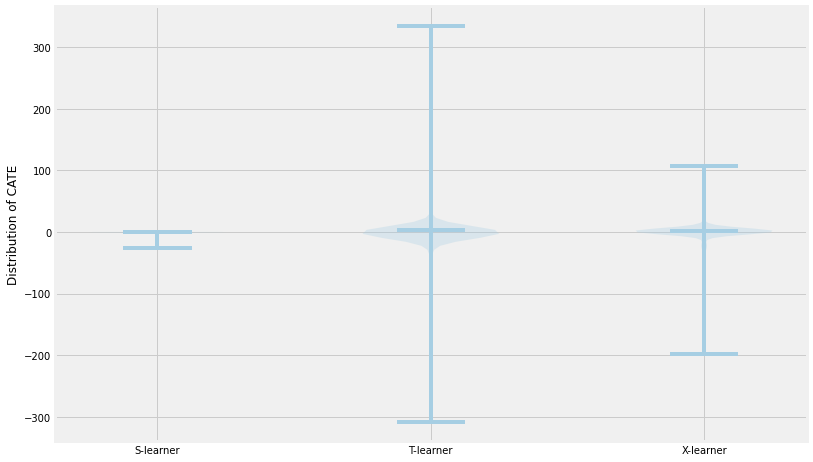

In [ ]:
plt.figure(figsize = (12,8))
plt.violinplot([cate_s.flatten(),
                cate_t.flatten(),
                cate_x.flatten()],showmeans=True)
plt.xticks([1,2,3],
           ['S-learner','T-learner','X-learner'])
plt.ylabel('Distribution of CATE')
